In [1]:
import pandas as pd
import msml.utils.mols as mu
import matplotlib.pyplot as plt
from rdkit import Chem
from tqdm import tqdm
tqdm.pandas()
from msml.definitions import *
%load_ext autoreload
%autoreload 2

In [2]:
props_calc = mu.MolPropertyCalculator()

# Analyze distribution of properties

In [3]:
df = pd.read_pickle(DATA_DIR / 'merged/datasets/NIST20_MoNA_A_Murcko_split.pkl')
mols = df['SMILES'].drop_duplicates().apply(Chem.MolFromSmiles)
props = mols.progress_apply(props_calc.mol_to_props)
props = pd.DataFrame(props.tolist())
props['EXACT MASS'] = mols.progress_apply(mu.get_mol_mass)

100%|██████████| 30251/30251 [02:00<00:00, 251.92it/s]


In [16]:
props.describe().loc[['min', 'max']].to_dict()

{'AtomicLogP': {'min': -13.054800000000025, 'max': 26.849200000000053},
 'NumHAcceptors': {'min': 0.0, 'max': 36.0},
 'NumHDonors': {'min': 0.0, 'max': 20.0},
 'PolarSurfaceArea': {'min': 0.0, 'max': 585.0300000000002},
 'NumRotatableBonds': {'min': 0.0, 'max': 68.0},
 'NumAromaticRings': {'min': 0.0, 'max': 8.0},
 'NumAliphaticRings': {'min': 0.0, 'max': 22.0},
 'FractionCSP3': {'min': 0.0, 'max': 1.0},
 'QED': {'min': 0.008950206972239864, 'max': 0.9479380820623227},
 'SyntheticAccessibility': {'min': 1.0549172379947862,
  'max': 8.043981630210263},
 'BertzComplexity': {'min': 2.7548875021634682, 'max': 3748.669248605835},
 'EXACT MASS': {'min': 74.08439831999999, 'max': 1558.8759155559997}}

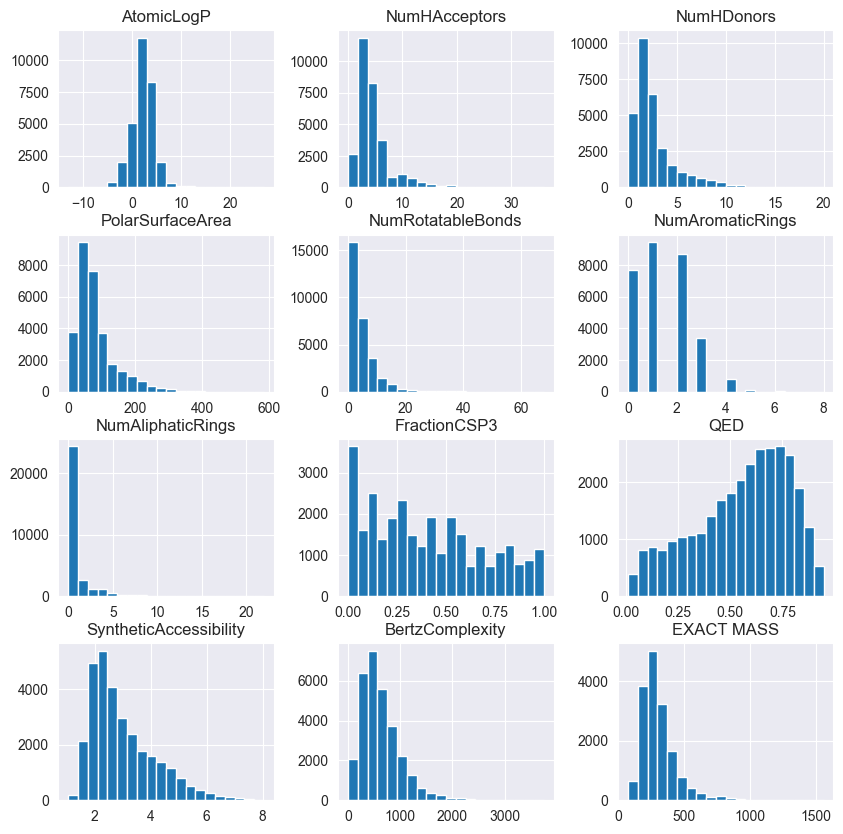

In [17]:
props.hist(figsize=(10, 10), bins=20)
plt.show()

# Check min max scaling

100%|██████████| 30251/30251 [01:50<00:00, 272.91it/s]


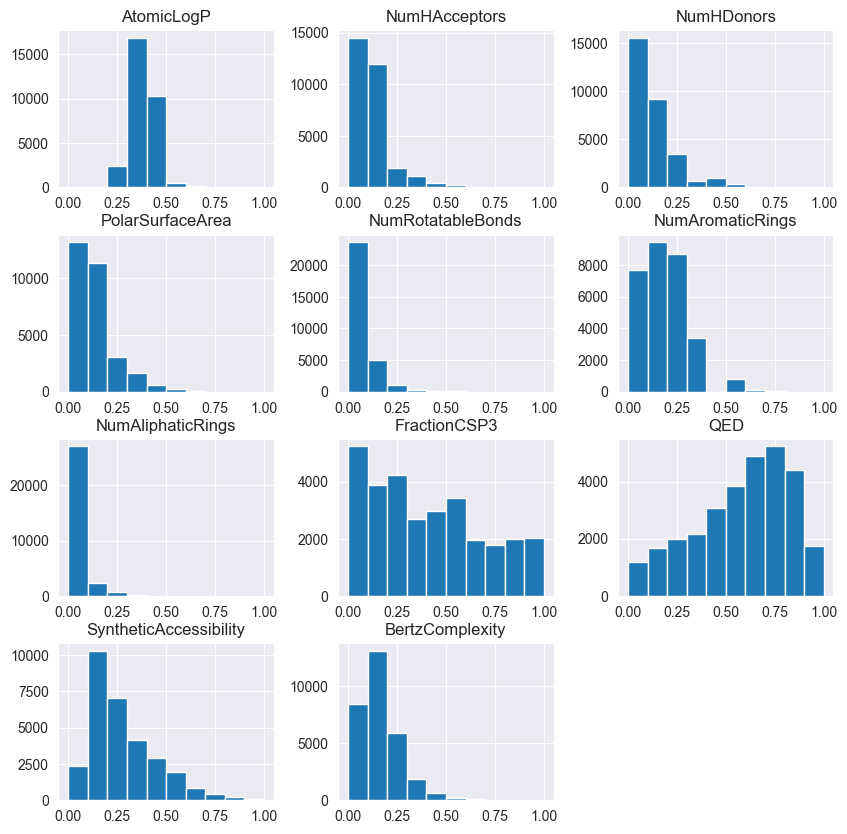

In [18]:
props_min_max = mols.progress_apply(lambda m: props_calc.mol_to_props(m, min_max_norm=True))
props_min_max = pd.DataFrame(props_min_max.tolist())
props_min_max.hist(figsize=(10, 10))
plt.show()

In [19]:
props_calc.denormalize_props(props_min_max.loc[0].to_dict())

{'AtomicLogP': 4.855300000000003,
 'NumHAcceptors': 2.0,
 'NumHDonors': 2.0,
 'PolarSurfaceArea': 57.53,
 'NumRotatableBonds': 14.0,
 'NumAromaticRings': 0.0,
 'NumAliphaticRings': 0.0,
 'FractionCSP3': 0.7222222222222222,
 'QED': 0.35549344690982654,
 'SyntheticAccessibility': 2.9756181385484,
 'BertzComplexity': 294.83856408674}

In [20]:
props_calc.mol_to_props(mols[0])

{'AtomicLogP': 4.855300000000003,
 'NumHAcceptors': 2,
 'NumHDonors': 2,
 'PolarSurfaceArea': 57.53,
 'NumRotatableBonds': 14,
 'NumAromaticRings': 0,
 'NumAliphaticRings': 0,
 'FractionCSP3': 0.7222222222222222,
 'QED': 0.35549344690982654,
 'SyntheticAccessibility': 2.9756181385484,
 'BertzComplexity': 294.83856408674}

# Check correlation with the molecular mass

array([[<AxesSubplot: xlabel='AtomicLogP', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='NumHAcceptors', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='NumHDonors', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='PolarSurfaceArea', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='NumRotatableBonds', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='NumAromaticRings', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='NumAliphaticRings', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='FractionCSP3', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='QED', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='SyntheticAccessibility', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='BertzComplexity', ylabel='AtomicLogP'>,
        <AxesSubplot: xlabel='EXACT MASS', ylabel='AtomicLogP'>],
       [<AxesSubplot: xlabel='AtomicLogP', ylabel='NumHAcceptors'>,
        <AxesSubplot: xlabel='NumHAcceptors', ylabel='NumHAcceptors'>,
        <AxesSubplot: xlabel='NumHDonor

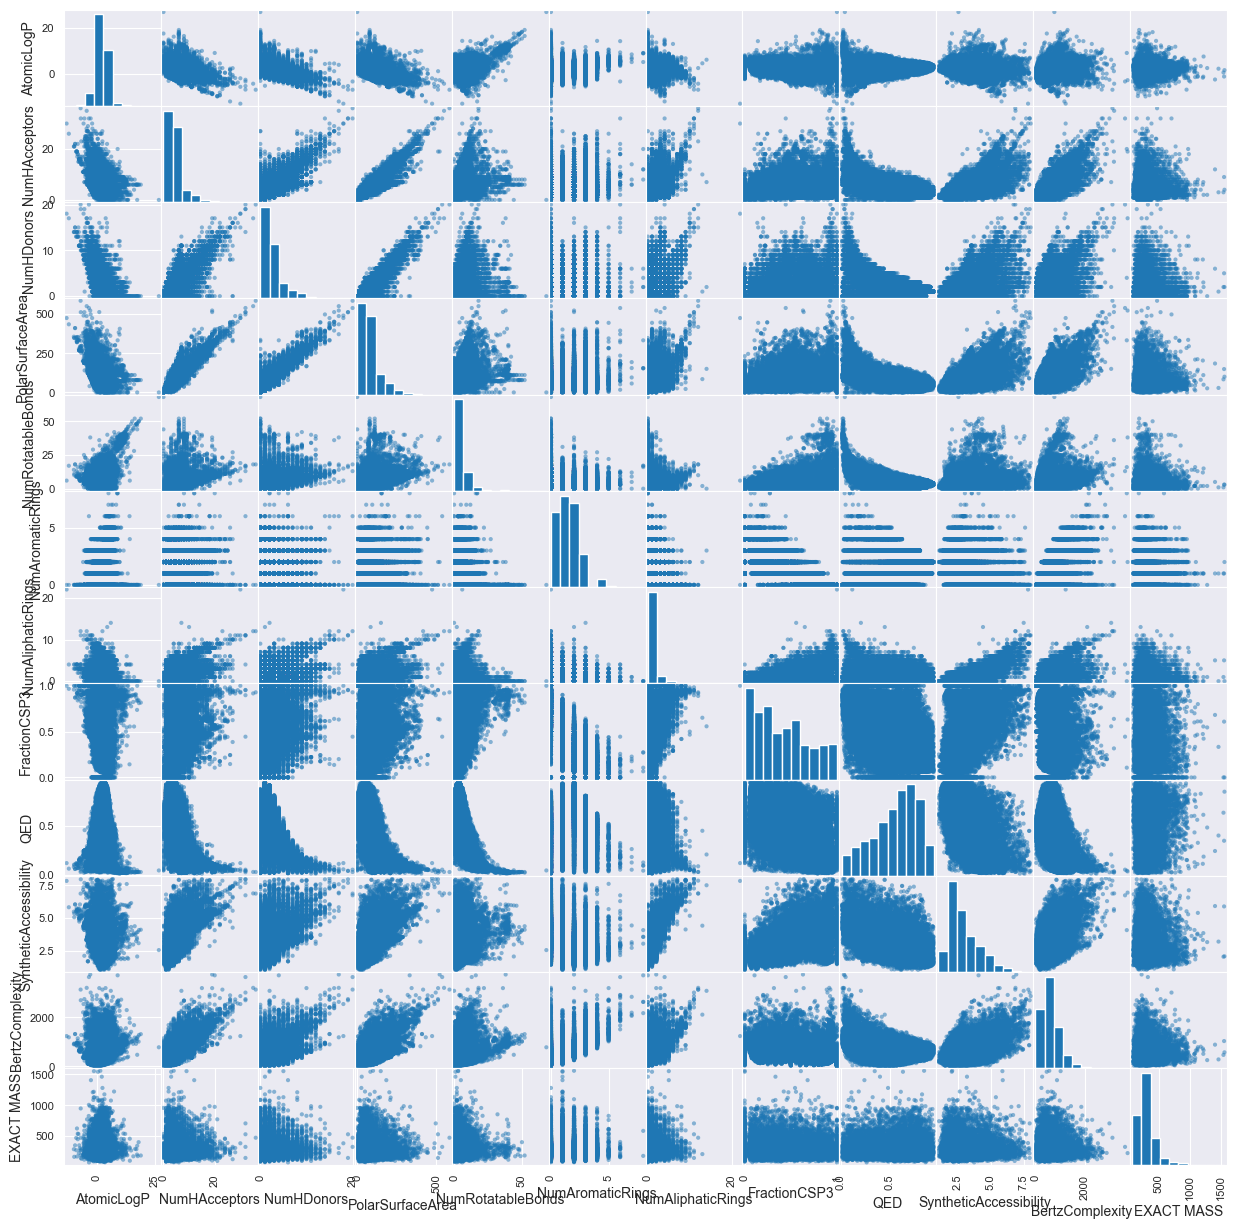

In [23]:
pd.plotting.scatter_matrix(props, figsize=(15, 15))

In [24]:
props.corr()

,AtomicLogP,NumHAcceptors,NumHDonors,PolarSurfaceArea,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,FractionCSP3,QED,SyntheticAccessibility,BertzComplexity,EXACT MASS
AtomicLogP,1.000000,-0.350524,-0.537564,-0.480043,0.222135,0.277300,-0.033871,-0.136240,0.162127,-0.138099,0.204430,0.001921
NumHAcceptors,-0.350524,1.000000,0.716253,0.887999,0.381009,0.072299,0.471163,0.259690,-0.583337,0.647935,0.700279,0.017509
NumHDonors,-0.537564,0.716253,1.000000,0.896185,0.357967,-0.108467,0.298835,0.292042,-0.620578,0.513364,0.417367,0.008294
PolarSurfaceArea,-0.480043,0.887999,0.896185,1.000000,0.444966,-0.054592,0.350675,0.278797,-0.675029,0.601421,0.592399,0.010144
NumRotatableBonds,0.222135,0.381009,0.357967,0.444966,1.000000,-0.190053,-0.012092,0.419364,-0.603587,0.279910,0.286324,0.010237
NumAromaticRings,0.277300,0.072299,-0.108467,-0.054592,-0.190053,1.000000,-0.235676,-0.686657,0.198622,-0.304230,0.526676,0.006765
NumAliphaticRings,-0.033871,0.471163,0.298835,0.350675,-0.012092,-0.235676,1.000000,0.466811,-0.229006,0.756792,0.466338,0.018985
FractionCSP3,-0.136240,0.259690,0.292042,0.278797,0.419364,-0.686657,0.466811,1.000000,-0.411870,0.572529,-0.058961,0.005808
QED,0.162127,-0.583337,-0.620578,-0.675029,-0.603587,0.198622,-0.229006,-0.411870,1.000000,-0.552178,-0.380691,-0.017678
SyntheticAccessibility,-0.138099,0.647935,0.513364,0.601421,0.279910,-0.304230,0.756792,0.572529,-0.552178,1.000000,0.493867,0.017002
